Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('../../final_result_impl_normals.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

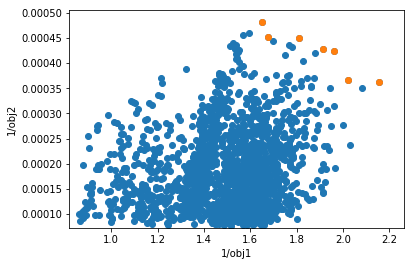

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


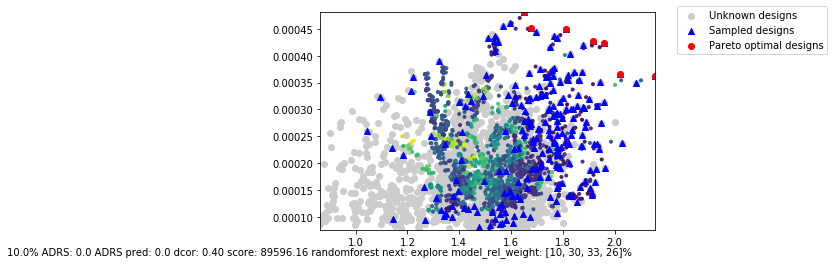

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1169,  653,  650,  647, 1565, 1968,  267, 2054,  268,    6,   27,
          2,    1,   36,    3,  502,   31, 1434,   98,  503, 1721, 1821,
          0,   96,  389, 1373,  129,  130,  423,  454,  923,  424,  131,
        132,  924, 1774,  425, 1886,  133, 1719,  426, 1972, 1973,  136,
          4,    7,  103,  430, 1892, 1917,  930, 1742,  134,    5,   97,
          8, 1831, 1828,  137, 1940,  925,   99,    9,  889,  926, 1348,
       2062, 1960, 1349,  481,  980,  488, 1847, 1988,  482,  483,  983,
       1355,  987,  191,  582, 1105,  535, 1055, 2024,  877, 1752,  192,
        489,  487,  589, 2011,  198,  981,  542, 1865,  193, 1882,  536,
        982, 1853,  484, 1832, 1756,  493,  205,  211,  583, 1989, 1511,
       1806,  143,  992, 1957,  549,  194,  594, 1380,  498, 1843, 1473,
       1974, 2005, 1357,  584, 1866,  216,  485,  537,  894, 1868, 1106,
       1112,  598, 1990, 1009,  195,  437, 1386, 1062,  937, 1376, 1345,
        142, 1378,  585, 1995, 1108, 1356,  538, 19